In [18]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense

In [19]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

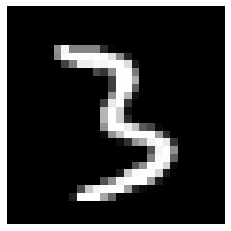

In [20]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,X_train.shape[0])
plt.axis("off")
plt.imshow(X_train[num],cmap="gray")
plt.show()

In [21]:
print("Highest Value before normalization: "+str(X_test.max()))
X_test_scaled=X_test/255.0
X_train_scaled=X_train/255.0
print("Highest Value after normalization: "+str(X_test_scaled.max()))

Highest Value before normalization: 255
Highest Value after normalization: 1.0


In [22]:
X_test_scaled=X_test_scaled.reshape(-1,28,28,1)
X_train_scaled=X_train_scaled.reshape(-1,28,28,1)

In [23]:
from sklearn.preprocessing import LabelBinarizer
y_test_1_encode = LabelBinarizer().fit_transform(y_test)
y_train_1_encode = LabelBinarizer().fit_transform(y_train)

In [24]:
test_num=random.randint(0,y_test.shape[0])
print("The value before One-Hot Encoding is "+str(y_test[test_num])+"\nArfter applying One-Hot Encoding is "+str(y_test_1_encode[test_num]))

The value before One-Hot Encoding is 9
Arfter applying One-Hot Encoding is [0 0 0 0 0 0 0 0 0 1]


In [25]:
model=Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(Dense(16,activation='tanh'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=0.5)
model.fit(X_train_scaled,y_train_1_encode,128,10,validation_data=(X_test_scaled,y_test_1_encode),callbacks=[early_stop],verbose=2)
#model.fit(X_train_scaled,y_train_1_encode,128,10,validation_data=(X_test_scaled,y_test_1_encode),verbose=2)

Epoch 1/10
469/469 - 2s - loss: 0.4374 - accuracy: 0.9030 - val_loss: 0.1772 - val_accuracy: 0.9582 - 2s/epoch - 5ms/step
Epoch 2/10
469/469 - 2s - loss: 0.1285 - accuracy: 0.9699 - val_loss: 0.1010 - val_accuracy: 0.9737 - 2s/epoch - 3ms/step
Epoch 3/10
469/469 - 2s - loss: 0.0838 - accuracy: 0.9794 - val_loss: 0.0745 - val_accuracy: 0.9794 - 2s/epoch - 4ms/step
Epoch 4/10
469/469 - 2s - loss: 0.0646 - accuracy: 0.9839 - val_loss: 0.0793 - val_accuracy: 0.9759 - 2s/epoch - 4ms/step


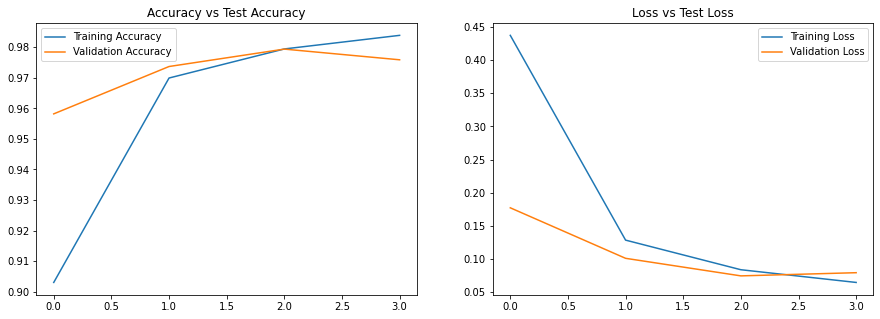

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
metrics=pd.DataFrame(model.history.history)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(metrics[['accuracy','val_accuracy']])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.title("Accuracy vs Test Accuracy")
plt.subplot(1,2,2)
plt.plot(metrics[['loss','val_loss']])
plt.legend(["Training Loss","Validation Loss"])
plt.title("Loss vs Test Loss")
plt.show()

,0,1,2,3,4,5,6,7,8,9
0,962,0,3,0,0,5,5,1,4,0
1,0,1117,1,2,1,0,5,0,9,0
2,1,2,1000,6,3,0,0,5,15,0
3,0,0,1,990,0,9,0,2,8,0
4,1,1,3,0,954,0,3,1,4,15
5,1,0,0,2,0,885,2,0,2,0
6,4,2,0,0,1,10,938,0,3,0
7,0,4,11,5,2,1,0,981,9,15
8,3,0,3,1,2,3,0,0,960,2
9,3,1,0,3,4,13,1,3,9,972


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.99      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.94      0.99      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



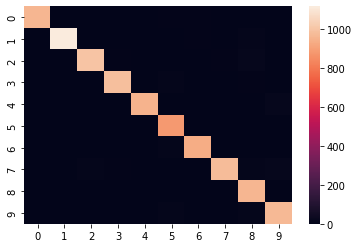

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
from seaborn import heatmap
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
y_test_1_encode_=np.argmax(y_test_1_encode,axis=1)
display(pd.DataFrame(confusion_matrix(y_test_1_encode_,x_test_predictions)))
heatmap(pd.DataFrame(confusion_matrix(y_test_1_encode_,x_test_predictions)))
print(classification_report(y_test_1_encode_,x_test_predictions))


In [30]:
'''import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))'''

"import tensorflow as tf\ntf.keras.utils.plot_model(\n    model,\n    show_shapes=True,\n    show_dtype=False,\n    show_layer_names=True,\n    rankdir='TB',\n    expand_nested=False,\n    dpi=96,\n    layer_range=None,\n    show_layer_activations=False\n)\nfrom IPython.display import SVG\nfrom keras.utils.vis_utils import model_to_dot\n\nSVG(model_to_dot(model).create(prog='dot', format='svg'))"

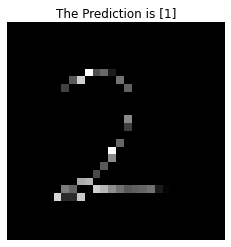

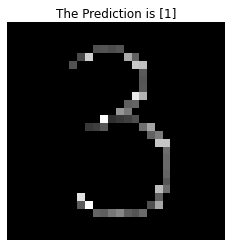

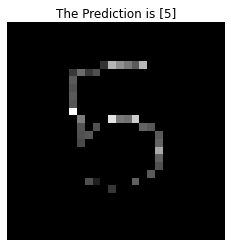

In [32]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
img_2_ = image.load_img('/content/2.png')
img_3_ = image.load_img('/content/3.png')
img_5_ = image.load_img('/content/5.png')
lst_img_=[img_2_,img_3_,img_5_]
for j in lst_img_:
  img  = tf.convert_to_tensor(np.asarray(j))
  img = tf.image.resize(img,(28,28))
  img = tf.image.rgb_to_grayscale(img)
  img = img.numpy()/255.0
  plt.axis("off")
  plt.imshow(img.reshape(28,28),cmap="gray")
  x_single_prediction = np.argmax(
      model.predict(img.reshape(1,28,28,1)),
      axis=1)
  plt.title("The Prediction is "+str(x_single_prediction))
  plt.show()
  print("\n")

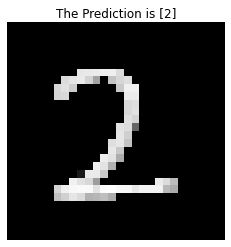

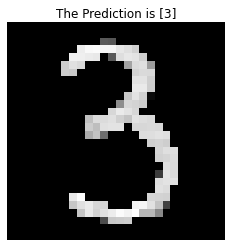

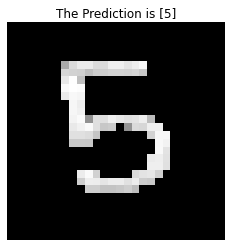

In [34]:
import cv2
kernel=np.ones((20,20),np.uint8)
for j in lst_img_:
  img  = tf.convert_to_tensor(np.asarray(j))
  img =cv2.dilate(np.array(img),kernel)
  img = tf.image.resize(img,(28,28))
  img = tf.image.rgb_to_grayscale(img)
  img = img.numpy()/255.0
  plt.axis("off")
  plt.imshow(img.reshape(28,28),cmap="gray")
  x_single_prediction = np.argmax(
      model.predict(img.reshape(1,28,28,1)),
      axis=1)
  plt.title("The Prediction is "+str(x_single_prediction))
  plt.show()
  print("\n")